## K-Means

In [17]:
import numpy as np
import matplotlib.pyplot as plt

### Ploting

In [18]:
def plot_center(new_means, assigned_center_points, iteration):
    plt.title("Iteration {:02d}".format(iteration))
    
    for i in range(len(assigned_center_points)):
        c = next(plt.gca()._get_lines.prop_cycler)['color']
        plt.scatter(assigned_center_points[i][:,0], assigned_center_points[i][:,1], c=c, 
                    label="Cluster {:02d}".format(i))
    
    plt.scatter(new_means[:,0], new_means[:,1], c='black', marker="X", label="Center")
    plt.legend()
    plt.show()

In [50]:
def plot_ssd(ssd):
    plt.title("SSD")
    plt.xlabel("Iteration")
    plt.plot(ssd)

### Input

In [51]:
N = 10  # Number of Samples per Cluster
K = 3   # Number of Clusters
M = K*N # Number of Total Samples
D = 2   # Numer of Dimensions

In [52]:
def get_samples():
    c1 = np.random.uniform(low=0.0, high=0.2, size=(N,2))
    c2 = np.random.uniform(low=0.4, high=0.6, size=(N,2))
    c3 = np.random.uniform(low=0.8, high=1.0, size=(N,2))
    samples = np.concatenate((c1, c2, c3))
    return samples

In [53]:
def get_center(samples):
    center_indicies = np.random.choice(range(M), size=3, replace=False)
    center = np.zeros((K,D))
    for i in range(K):
        center[i] = samples[center_indicies[i]]
    return center

### Training

In [54]:
def assignment_step(samples, center):
    distances = np.zeros((M,K))

    for i in range(K):
        distance = samples - center[i]
        distances[:,i] = np.linalg.norm(distance, axis=1)

    min_distances = np.min(distances, axis=1)
    assignments = np.zeros((M,K))

    for i in range(M):
        assignments[i] = np.where(min_distances[i] == distances[i], 1, 0)

    return assignments

In [55]:
def adjustment_step(means, samples, assignments):
    assigned_center = np.zeros((K,D))
    assigned_center_points = []
    
    for i in range(K):
        assigned_center_points.append(samples[np.where(assignments[:,i] == 1)])
        assigned_center[i] = np.mean(assigned_center_points[i], axis=0)

    return assigned_center, assigned_center_points

In [56]:
MAX_ITER = 5

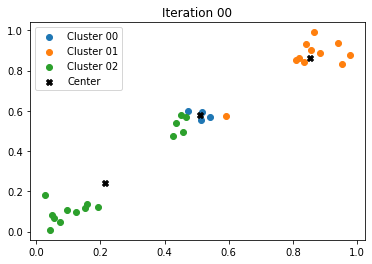

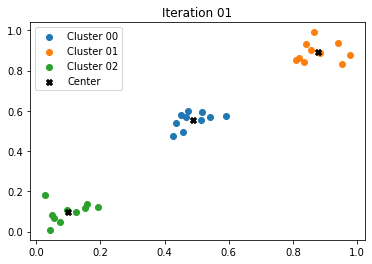

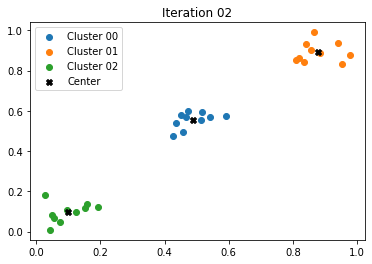

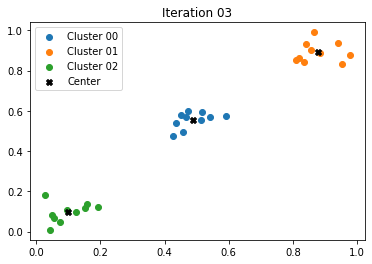

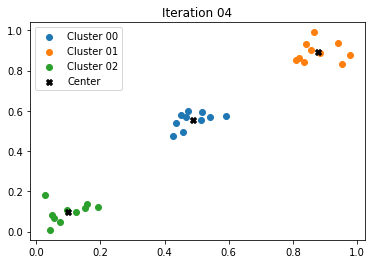

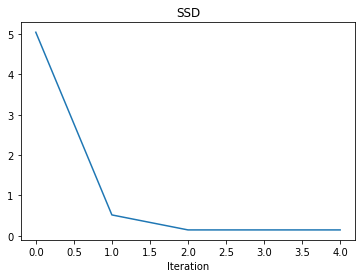

In [58]:
samples = get_samples()
center = get_center(samples)
ssd = []
for i in range(MAX_ITER):
    assignments = assignment_step(samples, center)
    
    differences = np.sum(np.square(samples[:, None, :] - center[None, :, :]), axis=-1)
    ssd.append(np.sum(assignments * differences))
    
    center, assigned_center_points = adjustment_step(center, samples, assignments)
    plot_center(center, assigned_center_points, i)
plot_ssd(ssd)